Simple plotting examples with TPP riboswitch
============================================

The data used in this example was collected by a graduate student in our lab,
David Qiu. These data are used here to illustrate the types of plots that can
be created using RNAvigate.

In breif, a DMS-MaP experiment was performed on an IVT
construct of a TPP riboswitch. These data were analyzed using ShapeMapper2 and
RingMapper. ShapeMapper2 data were used with RNAStructure's partition and
ProbabilityPlot to produce a pairing probabilities text file. A crystal structure
was obtained from the PDB. A secondary structure drawing based on the crystal
structure was created with StructureEditor. These steps yield the 5 data files
used in this notebook:
- DMS_TPP_profile.txt
- DMS_TPP_rings.txt
- 2gdi.pdb
- TPP-2GDI.nsd
- TPP-dms-bp.dp

## Import RNAvigate

In [1]:
import rnavigate as rnav

## Define the experimental samples and provide input file names
This step creates RNAvigate data classes representing the data contained in input files.
- sample: an arbitrary string used as a label on plots
- dmsmap: a ShapeMapper2 profile.txt. This will be renormalized for DMS reactivity by RNAvigate.
- ringmap: a RingMapper correlations file
- ss: a structure drawing file
- pairprob: a pairing probabilities file. Percentage values will be calculated by RNAvigate.
- pdb: a PDB atomic coordinates file

In [2]:
tpp = rnav.Sample(
    sample="TPP DMS-MaP",
    dmsmap="DMS_TPP_profile.txt",
    ringmap="DMS_TPP_rings.txt",
    ss="TPP-2GDI.nsd",
    pairprob="TPP-dms-bp.dp",
    pdb={"filepath":"2gdi.pdb", "chain":"X"})

## Display normalized ShapeMapper2 profile
Plot elements were removed in Adobe Illustrator for the simple example plot.

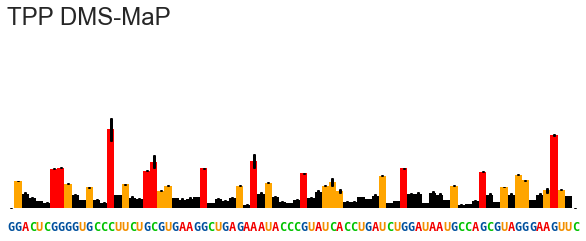

In [3]:
plot = rnav.plot_profile(samples=[tpp], seq_source="ss")
plot.axes[0,0].get_xaxis().set_visible(False)
plot.axes[0,0].get_yaxis().set_visible(False)
# plot.save("tpp_profile.svg")

## Compare modified and unmodified mutation rates
Here, we remove labels and axes for a simple example plot.

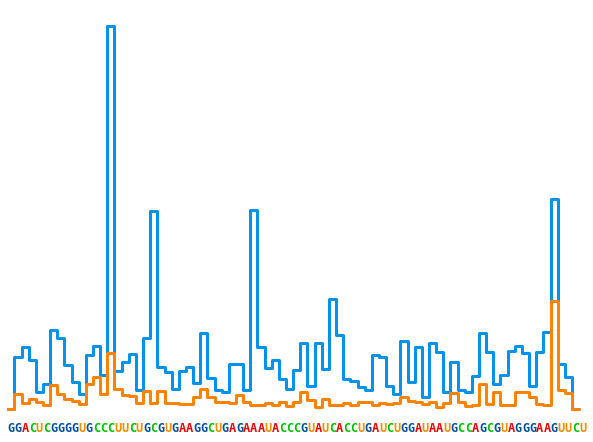

In [4]:
plot = tpp.plot_skyline(columns=["Modified_rate", "Untreated_rate"], region=[15,95])
plot.axes[0,0].get_xaxis().set_visible(False)
plot.axes[0,0].get_yaxis().set_visible(False)
plot.axes[0,0].get_legend().set_visible(False)
# plot.save("tpp_skyline.svg")

## Display secondary structure and pairing probabilities as arc plots

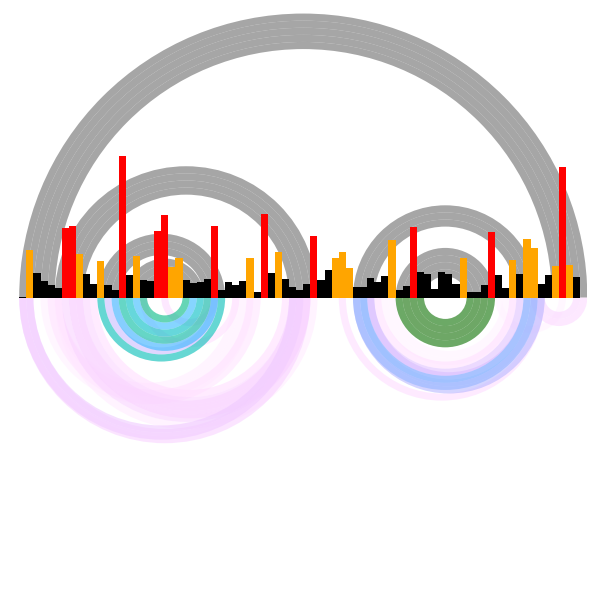

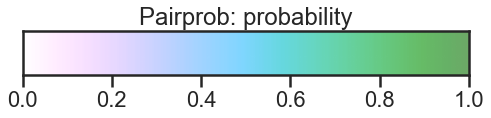

In [5]:
plot = tpp.plot_arcs(
    ct="ss",
    interactions="pairprob",
    title=False,
    seqbar=False,
    plot_error=False)
plot.axes[0,0].get_xaxis().set_visible(False)
# plot.save("tpp_arcs.svg")

## Display secondary structure and shape reactivity as circle plots

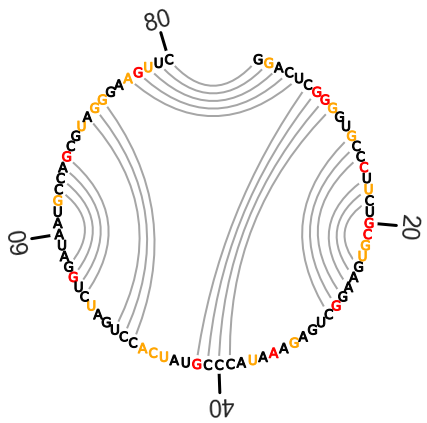

In [6]:
plot = tpp.plot_circle(
    seq_source="ss",
    colors="profile",
    ct="ss",
    title=False)
# plot.save("tpp_circle.svg")

## Display secondary structure drawing with nucleotides colored by reactivity

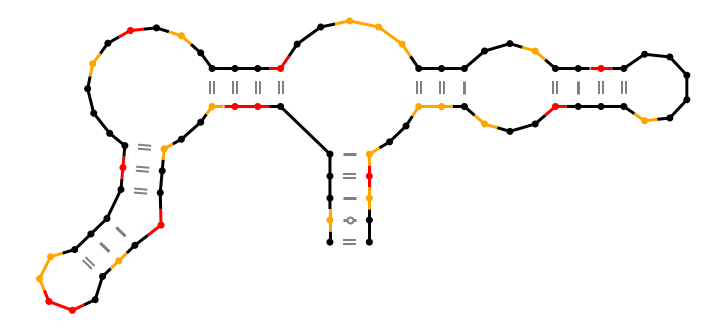

In [7]:
plot = tpp.plot_ss(
    profile="dmsmap",
    colors="profile",
    apply_color_to="structure",
    title=False,
    bp_style="conventional")
# plot.save("tpp_ss.svg")

## Display filtered RINGs on 3D structure
Here, we calculate mutual information, and add it to the ringmap data for filtering. See the notebook for figure 4 for a full explaination.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

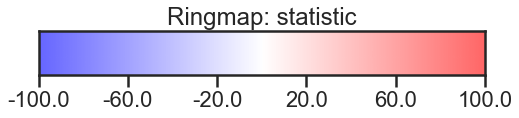

In [8]:
tpp.data["ringmap"].data.eval("MI = Statistic / (2 * Mod_Depth)", inplace=True)

plot = tpp.plot_mol(
    interactions="ringmap",
    interactions_filter={
        "ct": "ss",
        "positive_only": True,
        "Statistic_ge": 23,
        "min_cd": 6,
        "ss_only":True,
        "Zij_ge":2,
        "MI_ge": 0.000025
        },
    plot_kwargs={
        "width": 800,
        "height": 800,
        "background_alpha": 0,
        "orientation": [17.15,9.70,-0.02,-74.23,-0.79,-0.35,-0.18,0.46],
    },
    hide_cylinders=True,
    nt_color="grey",
    title=False)

In [9]:
# plot.save()